<a href="https://colab.research.google.com/github/samridhikapoor/Cancer_Detection_Model/blob/main/Cancer_Detection_using_Neural_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget https://www.dropbox.com/s/78tdjt4a9xdwmcx/archive%20%282%29.zip?dl=0

--2021-08-19 12:44:18--  https://www.dropbox.com/s/78tdjt4a9xdwmcx/archive%20%282%29.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.81.18, 2620:100:6030:18::a27d:5012
Connecting to www.dropbox.com (www.dropbox.com)|162.125.81.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/78tdjt4a9xdwmcx/archive%20%282%29.zip [following]
--2021-08-19 12:44:19--  https://www.dropbox.com/s/raw/78tdjt4a9xdwmcx/archive%20%282%29.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uccf06bceecf447a089ec5cf3160.dl.dropboxusercontent.com/cd/0/inline/BUj3qRIF41anArzqyJ5ZZddEhJgcA0Fmg2t-84Ue4arBMx-gOMj5diuuY3hZQDQTeAtjRaNbs6qBP_52F9L1Viy3JgoYgKYlX_aIiaGN0YXn0f5VQU__qwEZSEUpn6S_DcMXMBDVHjvUOq9SbJpMU6hw/file# [following]
--2021-08-19 12:44:19--  https://uccf06bceecf447a089ec5cf3160.dl.dropboxusercontent.com/cd/0/inline/BUj3qRIF41anArzqyJ5ZZddEhJgcA0Fmg2t-84Ue4arBMx-gOMj5diu

In [ ]:
!unzip arch*

Archive:  archive (2).zip?dl=0
  inflating: Brain Tumor Data Set/Brain Tumor Data Set/Brain Tumor/Cancer (1).jpg  
  inflating: Brain Tumor Data Set/Brain Tumor Data Set/Brain Tumor/Cancer (1).png  
  inflating: Brain Tumor Data Set/Brain Tumor Data Set/Brain Tumor/Cancer (1).tif  
  inflating: Brain Tumor Data Set/Brain Tumor Data Set/Brain Tumor/Cancer (10).jpg  
  inflating: Brain Tumor Data Set/Brain Tumor Data Set/Brain Tumor/Cancer (10).tif  
  inflating: Brain Tumor Data Set/Brain Tumor Data Set/Brain Tumor/Cancer (100).jpg  
  inflating: Brain Tumor Data Set/Brain Tumor Data Set/Brain Tumor/Cancer (1000).jpg  
  inflating: Brain Tumor Data Set/Brain Tumor Data Set/Brain Tumor/Cancer (1001).jpg  
  inflating: Brain Tumor Data Set/Brain Tumor Data Set/Brain Tumor/Cancer (1002).JPG  
  inflating: Brain Tumor Data Set/Brain Tumor Data Set/Brain Tumor/Cancer (1003).jpg  
  inflating: Brain Tumor Data Set/Brain Tumor Data Set/Brain Tumor/Cancer (1004).jpg  
  inflating: Brain Tumor D

In [ ]:
import pandas as pd
import numpy as np
import shutil
import glob
import os
import math
import warnings
warnings.filterwarnings(action="ignore")
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import classification_report
#tensorflow libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import MaxPooling2D, Dense, Dropout,Flatten, Conv2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import TensorBoard,EarlyStopping 

In [ ]:
#count the number of images in the respective classes
ROOT_DIR="/content/Brain Tumor Data Set/Brain Tumor Data Set"
number_of_images={}
for dir in os.listdir(ROOT_DIR):
  number_of_images[dir]=len(os.listdir(os.path.join(ROOT_DIR,dir)) )


In [ ]:
number_of_images.items()

dict_items([('Healthy', 2087), ('Brain Tumor', 2513)])

We splitted the data in such a way that:-
70% for Train(training) data
15% for validation
15% for testing

In [ ]:
def datafolder(p,split):                                                                                                  #Niranjan
   #we will create a folder for storing data for train test
  if not os.path.exists("./"+p):
   os.mkdir("./"+p)

   for dir in os.listdir(ROOT_DIR):
    os.makedirs("./"+p+"/"+dir)
    for img in np.random.choice(a=os.listdir(os.path.join(ROOT_DIR, dir)),size=(math.floor(split*number_of_images[dir])-5),replace=False):
      O=os.path.join(ROOT_DIR,dir,img)
      D=os.path.join("./"+p,dir)
      shutil.copy(O,D)
      os.remove(O)
  else: 
     print(f"{p}folder exists")
      

In [ ]:
datafolder("train",0.7)

In [ ]:
datafolder("val",0.15)

In [ ]:
datafolder("test",0.15)

# MODEL BUILD

In [ ]:
from keras.layers import Conv2D,MaxPool2D,Dropout,Flatten,Dense,BatchNormalization,GlobalAvgPool2D
from keras.models import Sequential 
from keras.preprocessing.image import ImageDataGenerator
import keras 

In [ ]:
#model.compile(optimizer='adam', loss= keras.losses.binary_crossentropy,metrics=['accuracy'])

## PREPARING OUR DATA USING DATA GENERATOR

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.mobilenet import preprocess_input

In [ ]:
def preprocessingImages1(path): #nischay
  """
  input : Path
  output : Pre processed images
  """
  image_data = ImageDataGenerator(zoom_range=0.2, shear_range=0.2,preprocessing_function= preprocess_input , horizontal_flip=True)
  image = image_data.flow_from_directory(directory=path , target_size =(224,224), batch_size= 32, class_mode= 'binary')

  return image

In [ ]:
path="/content/train"
train_data= preprocessingImages1(path)

Found 3209 images belonging to 2 classes.


# for testing data preprOcessed data

In [ ]:
def preprocessingImages2(path):
  """
  input : Path
  output : Pre processed images
  """
  image_data = ImageDataGenerator(preprocessing_function= preprocess_input)
  image = image_data.flow_from_directory(directory=path , target_size =(224,224), batch_size= 32, class_mode= 'binary')

  return image

In [ ]:
path="/content/test"
test_data=preprocessingImages2(path)

Found 679 images belonging to 2 classes.


In [ ]:
path="/content/val"
val_data=preprocessingImages2(path)

Found 679 images belonging to 2 classes.


In [ ]:
# Early stopping and model check point

from keras.callbacks import ModelCheckpoint , EarlyStopping

#early stopping

es = EarlyStopping(monitor="val_accuracy",min_delta=0.01, patience= 3,verbose=1,mode='auto')

#model check point 
mc = ModelCheckpoint(monitor="val_accuracy",filepath="./bestmodel.h5", save_best_only = True,verbose=1,mode='auto')

cd=[es,mc]

# MODEL TRAINING

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Flatten, Dense
from keras.models import Model, load_model
from keras.applications.mobilenet import MobileNet
import keras

In [ ]:
base_model = MobileNet(input_shape=(224,224,3), include_top= False)

17235968/17225924 [==============================] - 1s 0us/step


In [ ]:
for layer in base_model.layers:
  layer.trainable = False

In [ ]:
X = Flatten()(base_model.output)
X = Dense(units=1, activation='sigmoid')(X)

model = Model(base_model.input, X)

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 112, 112, 32)      0     

In [ ]:
model.compile(optimizer='rmsprop', loss=keras.losses.binary_crossentropy, metrics=['accuracy'])

In [ ]:
## Call back
from keras.callbacks import ModelCheckpoint, EarlyStopping

#model checkpoint
mc = ModelCheckpoint(filepath="bestmodel.h5", monitor='val_accuracy', verbose=1, save_best_only= True)

#Early stopping
es = EarlyStopping(monitor="val_accuracy", min_delta=0.01, patience=3, verbose=1)

cb=[mc, es]

In [ ]:
hist = model.fit_generator(train_data, steps_per_epoch=8, epochs=30, validation_data=val_data, validation_steps=16, callbacks=cb)

Epoch 1/30
8/8 [==============================] - 36s 833ms/step - loss: 9.8673 - accuracy: 0.5742 - val_loss: 1.0393 - val_accuracy: 0.9004

Epoch 00001: val_accuracy improved from -inf to 0.90039, saving model to bestmodel.h5
Epoch 2/30
8/8 [==============================] - 6s 776ms/step - loss: 1.8813 - accuracy: 0.8047 - val_loss: 0.6746 - val_accuracy: 0.8672

Epoch 00002: val_accuracy did not improve from 0.90039
Epoch 3/30
8/8 [==============================] - 6s 773ms/step - loss: 2.5457 - accuracy: 0.7773 - val_loss: 0.4343 - val_accuracy: 0.9160

Epoch 00003: val_accuracy improved from 0.90039 to 0.91602, saving model to bestmodel.h5
Epoch 4/30
8/8 [==============================] - 6s 795ms/step - loss: 0.3981 - accuracy: 0.9102 - val_loss: 1.3615 - val_accuracy: 0.8125

Epoch 00004: val_accuracy did not improve from 0.91602
Epoch 5/30
8/8 [==============================] - 6s 784ms/step - loss: 2.8927 - accuracy: 0.7031 - val_loss: 4.0387 - val_accuracy: 0.7012

Epoch 000

In [ ]:
#load best fit model
model= load_model("/content/bestmodel.h5")

In [ ]:
acc= model.evaluate_generator(test_data)[1]

print(f"Our model accuracy is: {acc*100} % ")

Our model accuracy is: 91.75257682800293 % 


In [ ]:
h = hist.history
h.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

<function matplotlib.pyplot.show>

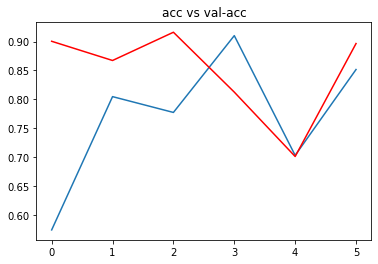

In [ ]:
plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'], c='red')
plt.title("acc vs val-acc")
plt.show

<function matplotlib.pyplot.show>

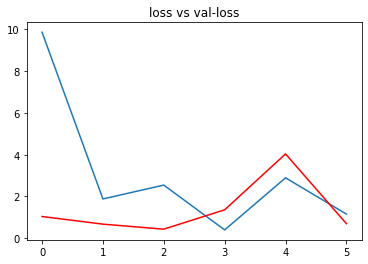

In [ ]:
plt.plot(h['loss'])
plt.plot(h['val_loss'], c='red')
plt.title("loss vs val-loss")
plt.show

In [ ]:
from keras.preprocessing import image

[[0.9999199]]
non cancerous


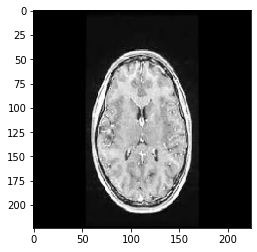

In [ ]:
#path for the image to see if it predicts the correct class or not

path = "/content/test/Healthy/Not Cancer  (1001).jpg"
img = image.load_img(path, target_size=(224, 224) )

i=image.img_to_array(img)/255
#i=preprocess_input(i)
input_arr=np.array([i])
input_arr.shape


predictions=model.predict(input_arr)

#predictions=np.argmax(predictions,axis=1)
print(predictions)

#precentage of cancer 
if predictions > 0.6:
  print("non cancerous")
else :
  print("cancerous")

#to display the image
plt.imshow(input_arr[0])
plt.show()
input_arr.shape
input_arr =np.expand_dims(input_arr, axis=0)